In [46]:
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import tensorflow as tf
from google.colab import files
from sklearn.metrics import confusion_matrix
import seaborn as sns

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


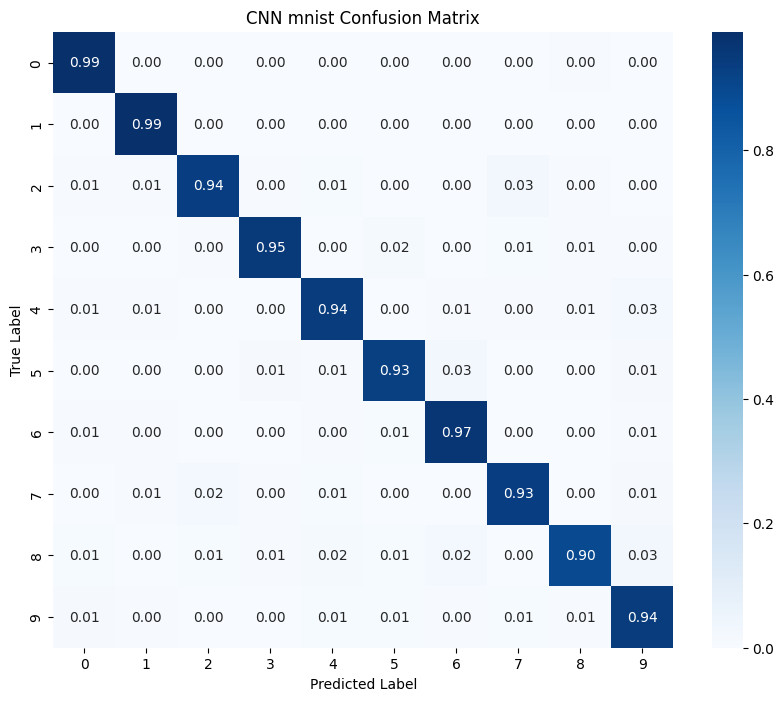

In [ ]:
# matrice de confusion cnn
y_test_classes = np.argmax(test_labels, axis=1)
y_predcnn = cnn_model.predict(test_data)
y_predcnn_classes = np.argmax(y_predcnn, axis=1)

# Création de la matrice de confusion avec normalisation
conf_matrix = confusion_matrix(y_test_classes, y_predcnn_classes, normalize="true")


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN mnist Confusion Matrix')
plt.show()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd  /content/drive/MyDrive/data
%pwd

In [ ]:
# 1. Loading data

# Load the MNIST dataset

train_images = np.load("train_images.npy")
train_labels = np.load("train_labels.npy")
test_images = np.load("test_images.npy")
test_labels = np.load("test_labels.npy")

Train images shape: (60000, 28, 28), Train labels shape: (60000,)
Test images shape: (10000, 28, 28), Test labels shape: (10000,)
Number of classes: 10, Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


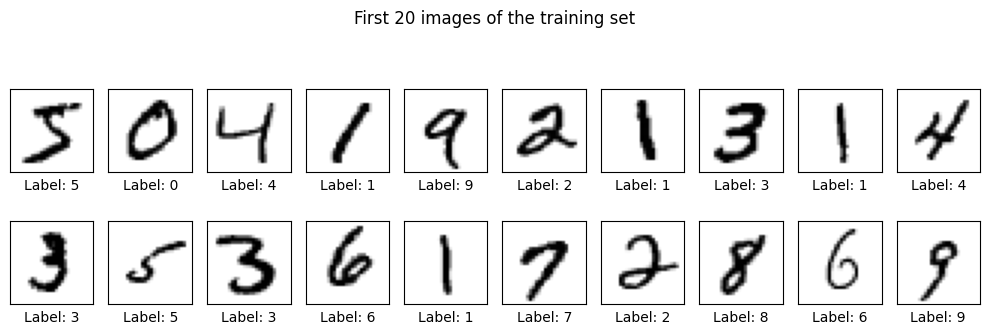

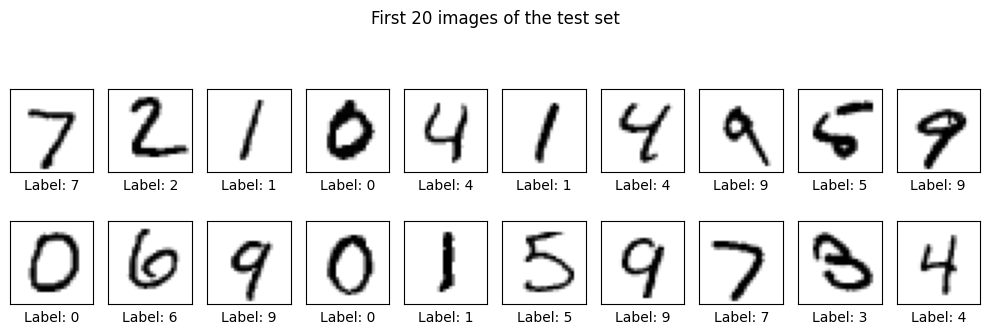

In [ ]:


# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Print the shape of the datasets and the number of classes
print(f"Train images shape: {train_images.shape}, Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}, Test labels shape: {test_labels.shape}")
nb_classes = len(set(train_labels))
print(f'Number of classes: {nb_classes}, Classes: {sorted(set(train_labels))}')

# 2. Visualization of a subset of the training set
n = 20  # Number of images to display
cols = min(n, 10)  # Number of columns (up to 10)
rows = (n // cols) + 1  # Number of rows

plt.figure(figsize=(cols, rows * 1.5))
for i in range(n):  # Display the first n images from the training set
    plt.subplot(rows, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Label: {train_labels[i]}')

plt.tight_layout()  # Improve spacing between images
plt.suptitle(f'First {n} images of the training set', y=1.02)
plt.subplots_adjust(top=0.88)
plt.show()

# 3. Visualization of a subset of the test set
plt.figure(figsize=(cols, rows * 1.5))
for i in range(n):  # Display the first n images from the test set
    plt.subplot(rows, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Label: {test_labels[i]}')

plt.tight_layout()  # Improve spacing between images
plt.suptitle(f'First {n} images of the test set', y=1.02)
plt.subplots_adjust(top=0.88)
plt.show()



In [ ]:
# Flatten the images to 1D vectors and normalize the pixel values
test_images = test_images.astype('float32')
test_images = test_images / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert labels to one-hot encoding
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)


In [ ]:
# shuffle the data
ns =  train_images.shape[0] #number of examples
np.random.seed()
shuffle_index = np.random.permutation(ns)
train_images, train_labels = train_images[shuffle_index,:], train_labels[shuffle_index,]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

# Create the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(256, activation='relu', input_shape=(28*28,)))
mlp_model.add(Dropout(0.3))  # 30% dropout for regularization

# Second hidden layer with 128 neurons, ReLU activation
mlp_model.add(Dense(128, activation='relu'))

# Output layer with softmax activation for multi-class classification
mlp_model.add(Dense(10, activation='softmax'))

# Use RMSprop with a reduced learning rate (e.g., 0.001)
mlp_optimizer = RMSprop(learning_rate=0.001)

# Compile the model with the new optimizer
mlp_model.compile(optimizer=mlp_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])





/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.utils import plot_model, to_categorical

mlp_model.summary()


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Reshape images to (28, 28, 1) and normalize the pixel values
train_images_cnn = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255
test_images_cnn = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255


In [ ]:

# model
history = mlp_model.fit(train_images, train_labels, validation_split=0.2, epochs = 10, batch_size=128)
scores = mlp_model.evaluate(test_images, test_labels)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))



In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

# Create the CNN model
cnn_model = Sequential()

# First convolutional layer + max pooling
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer + max pooling
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
cnn_model.add(Flatten())

# Fully connected layer
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))

# Output layer for 10 classes
cnn_model.add(Dense(10, activation='softmax'))

# Use RMSprop with a reduced learning rate (e.g., 0.001)
cnn_optimizer = RMSprop(learning_rate=0.001)

# Compile the model with the new optimizer
cnn_model.compile(optimizer=cnn_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:

# model training
history2 = model_cnn .fit(train_images_cnn, train_labels, validation_split=0.2, epochs = 10, batch_size=200)
scores = mode_cnn.evaluate(test_images_cnn, test_labels)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))


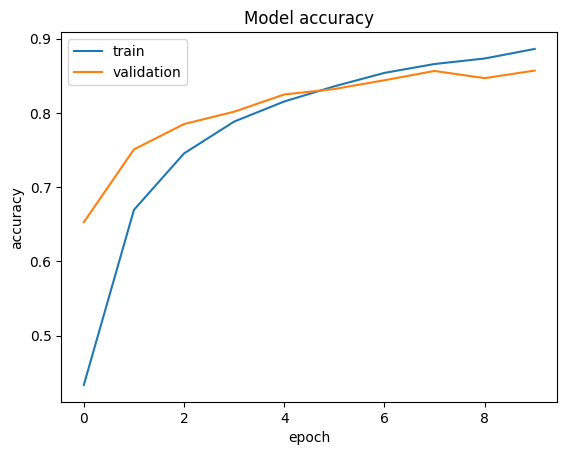

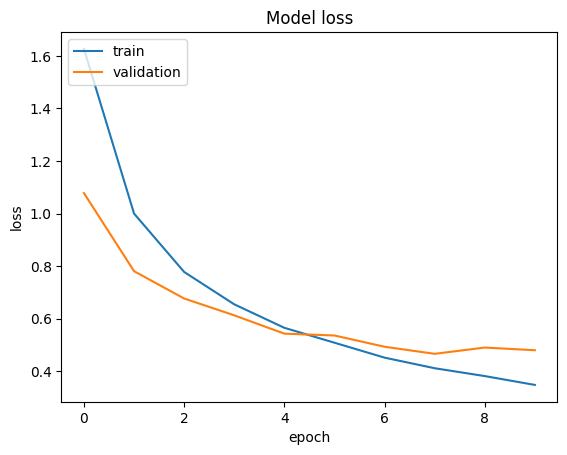

In [ ]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

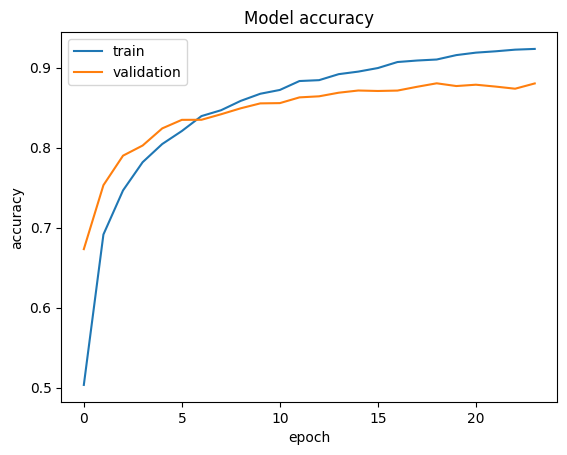

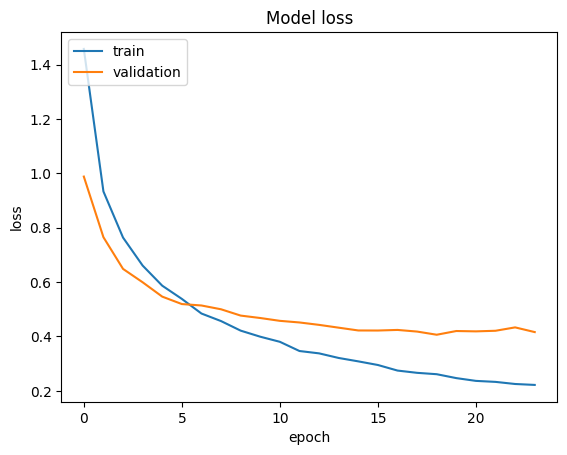

In [ ]:
#  "Accuracy"
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


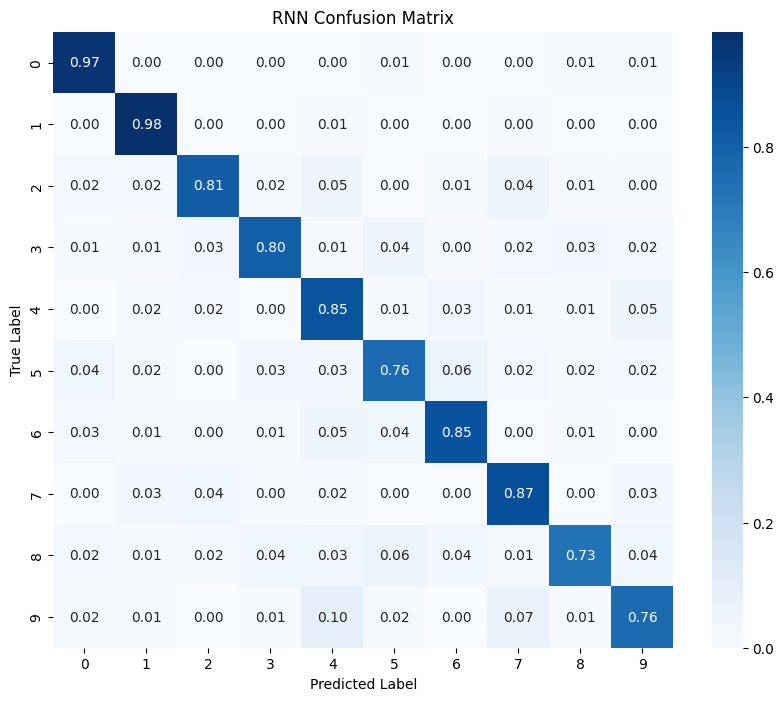

In [ ]:
# matrice de confusion
y_test_classes = np.argmax(test_labels, axis=1)
y_predrnn = mlp_model.predict(test_images)
y_predrnn_classes = np.argmax(y_predrnn, axis=1)

# Création de la matrice de confusion avec normalisation
conf_matrix = confusion_matrix(y_test_classes, y_predrnn_classes, normalize="true")


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RNN Confusion Matrix')
plt.show()
